# Assessed Problem #2

$(1): \ \ \ u' = −a(u − v)$

$(2): \ \ \ v' = cu − v − uw$

$(3): \ \ \ w' = −bw + uv$

known as the Lorenz equations, are encountered in the theory of fluid dynamics
(atmospheric convection) and other areas of physics - lasers, electric
circuits and chemical reactions.

Letting a = 5.0, b = 0.9, and c = 8.2

u(0) = 0, v(0) = 1.0, and w(0) = 2.0

These are Coupled first order differential equations.

All of the methods of solving First order differential equations in this course allow only one integration dummy variable
as such each of the equations here must be related to this variable.

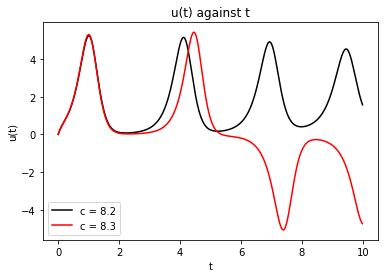

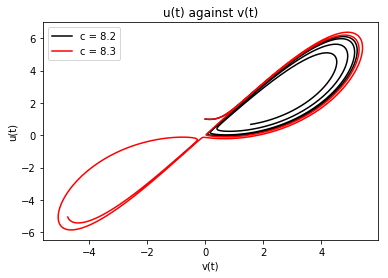

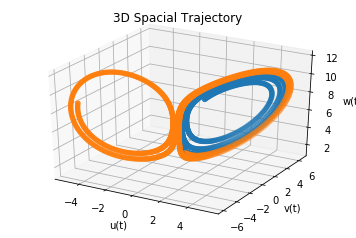

In [1]:
#Libraries
from scipy.integrate import odeint
from numpy import arange
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import plot, show, legend, figure, title, xlabel, ylabel
#

#Constants
a = 5.0
b = 0.9
c = [8.2, 8.3]  #c is defined as an array to allow iteration of the variable instead of repeating the code

u0 = 0.0 #Initial conditions
v0 = 1.0
w0 = 2.0
#

#Subroutines

    #Capitals represent a single derivative with respect to t whereas a lowercase represents no derivative
    #This is to counteract the fact that apostrophes are not permitted in variable names
def L(y, t, a, b, c):           #Returns the derivatives of u,v, and w as an array of the coupled differential equations:
    u,v,w = y                   #Equate all integration variables to the dummy variable
    U = -a*(u-v)                #Equation (1)
    V = c*u-v-u*w               #Equation (2)
    W = -b*w + u*v              #Equation (3)
    return U,V,W                #Return the derivatives
#

#Computation
for i in range(2):                                                             #Do this once for each value of c
    x = arange(0,10,0.01)                                                      #Define an range of time values
    y = odeint(L,[u0,v0,w0],x, args = (a,b,c[i]))                              #Use ODEint to define the solutions to the equations
    _y =odeint(L,[u0,v0,w0],x, args = (a,b,c[1]))
    figure(0)                                                                  #In the 0th figure
    plot(x,y[:,0], ["k-", "r-"][i], label = ["c = 8.2","c = 8.3"][i])          #Plot u(t) against t for this value of c
    title("u(t) against t")
    xlabel("t")
    ylabel("u(t)")
    legend()
    
    figure(1)                                                                  #In the 1st figure
    plot(y[:,0],y[:,1], ["k-", "r-"][i], label = ["c = 8.2","c = 8.3"][i])     #Plot u(t) against v(t) for this value of c
    title("u(t) against v(t)")
    xlabel("v(t)")
    ylabel("u(t)")
    legend()
show()                                                                         #Output the plotted graphs
#
y = odeint(L,[u0,v0,w0],x, args = (a,b,c[0]))                              #Use ODEint to define the solutions to the equations
_y =odeint(L,[u0,v0,w0],x, args = (a,b,c[1]))
ax = figure().add_subplot(111, projection = '3d')
ax.scatter( y[:,0], y[:,1], y[:,2])
ax.scatter(_y[:,0],_y[:,1],_y[:,2])
ax.set_title("3D Spacial Trajectory")
ax.set_xlabel("u(t)")
ax.set_ylabel("v(t)")
ax.set_zlabel("w(t)")
show()

You can see from the first diagram that when c is increased to 8.3 the u(t) displacement contains negative values as well as the positive peaks found in the first value of c, this is reflected in the spatial trajectory diagram since the first value of c has spiralling loops in the positive quadrant whereas when c = 8.3 the spiral also switches to the negative quadrant. this switch is also visible in the 3 dimensional diagram (despite the fact that Jupyter Notebook doesn't allow the graph to rotate so it just looks like a bad 2D graph)